### Introduction

This dataset features the top 5000 albums of all time as rated by users on albumoftheyear.org. There is a widespread belief that older music is superior to new music and that classic albums are no longer produced. The primary objective of collecting this data is to investigate the validity of these claims. Additionally, this dataset allows us to explore the evolution of music genres over the years, identify which years were the most significant for music, and conduct various other analyses to gain deeper insights into the trends and patterns in the music industry.

### Dataset

The data was collected from the "Best Albums of All Time" section by user score on albumoftheyear.org (AOTY). This dataset provides a list of top-rated albums as determined by user ratings, including information such as album titles, artists, release dates, genres, user scores, and the number of ratings each album received.

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('aoty.csv')

df.head()

,id,title,artist,release_date,genres,user_score,rating_count,album_link
0,1,To Pimp a Butterfly,Kendrick Lamar,"March 15, 2015","Conscious Hip Hop, Jazz Rap, West Coast Hip Hop",95,"28,594 ratings",https://www.albumoftheyear.org/album/29250-ken...
1,2,"good kid, m.A.A.d city",Kendrick Lamar,"October 22, 2012","Conscious Hip Hop, West Coast Hip Hop",94,"22,283 ratings",https://www.albumoftheyear.org/album/3840-kend...
2,3,In Rainbows,Radiohead,"October 10, 2007","Art Rock, Alternative Rock",94,"19,366 ratings",https://www.albumoftheyear.org/album/363-radio...
3,4,Songs in the Key of Life,Stevie Wonder,"September 28, 1976","Soul, Progressive Soul",94,"5,952 ratings",https://www.albumoftheyear.org/album/5600-stev...
4,5,OK Computer,Radiohead,"May 21, 1997","Alternative Rock, Art Rock",94,"21,163 ratings",https://www.albumoftheyear.org/album/362-radio...


### Data Cleaning

For our analysis, the album link column is not necessary, so we will remove it from the dataset.

In [2]:
df = df.drop(columns=['album_link'])
df.head()

,id,title,artist,release_date,genres,user_score,rating_count
0,1,To Pimp a Butterfly,Kendrick Lamar,"March 15, 2015","Conscious Hip Hop, Jazz Rap, West Coast Hip Hop",95,"28,594 ratings"
1,2,"good kid, m.A.A.d city",Kendrick Lamar,"October 22, 2012","Conscious Hip Hop, West Coast Hip Hop",94,"22,283 ratings"
2,3,In Rainbows,Radiohead,"October 10, 2007","Art Rock, Alternative Rock",94,"19,366 ratings"
3,4,Songs in the Key of Life,Stevie Wonder,"September 28, 1976","Soul, Progressive Soul",94,"5,952 ratings"
4,5,OK Computer,Radiohead,"May 21, 1997","Alternative Rock, Art Rock",94,"21,163 ratings"


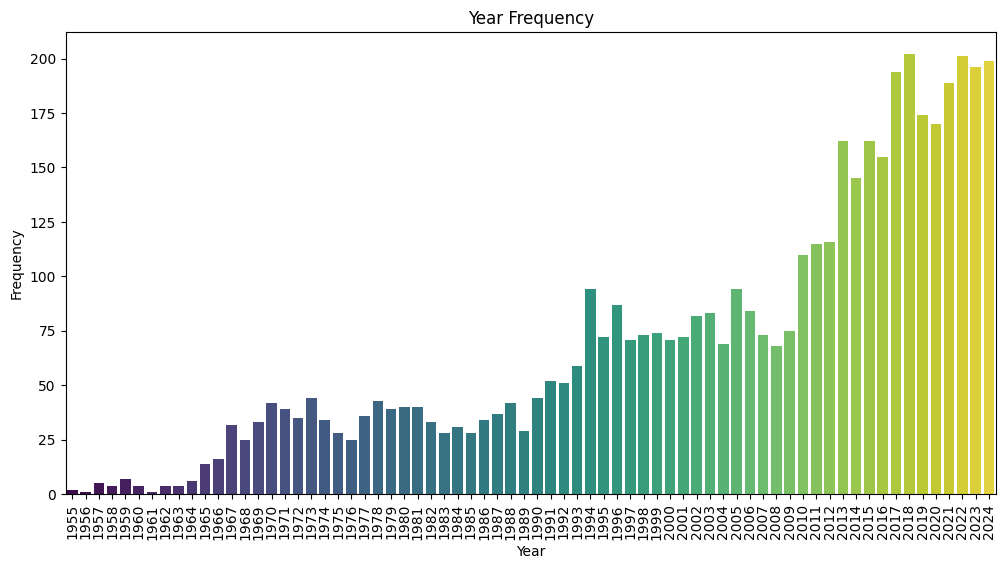

In [3]:
import matplotlib.pyplot as plt

df['release_date'] = pd.to_datetime(df['release_date'], format='%B %d, %Y', errors='coerce')

df['year'] = df['release_date'].dt.year.astype('Int64')

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='year', palette='viridis', legend=False)
plt.title('Year Frequency')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

From the initial analysis, it appears that a significant portion of the top 5000 albums are relatively recent releases. It becomes evident that a substantial number of albums in the top 5000 list were released after 2017. This trend could be influenced by the tendency of listeners to favor newer albums over older ones. It is important to consider this potential bias when interpreting the data, as it may skew the perception of recent albums being superior. Further analysis is required to account for this bias and to explore whether older albums are underrepresented due to changes in listening habits and rating behaviors over time. This observation might suggest that many of the highest-rated albums have been produced in recent years. However, to draw a more accurate conclusion, we need to delve deeper into the data and conduct further investigations. By examining additional factors such as genre trends, user ratings over time, and the distribution of high-rated albums across different decades, we can gain a more comprehensive understanding of whether the best albums are indeed being produced in recent times or if there are other underlying patterns.

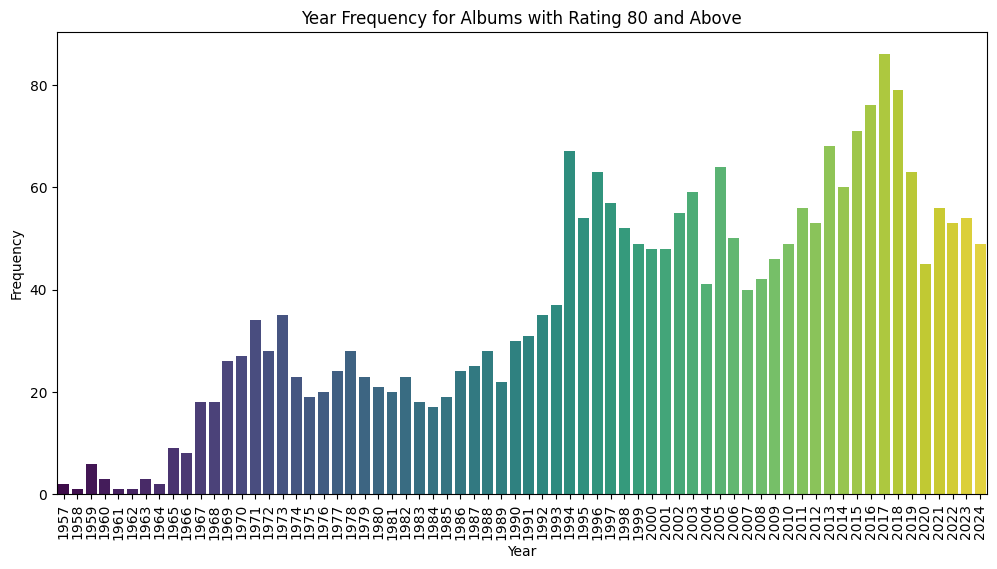

In [4]:
df_high_rating_80 = df[df['user_score'] >= 80]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_high_rating_80, x='year', hue='year', palette='viridis', legend=False)
plt.title('Year Frequency for Albums with Rating 80 and Above')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [5]:
top_10_years = df_high_rating_80['year'].value_counts().head(10)
print(top_10_years)

year
2017    86
2018    79
2016    76
2015    71
2013    68
1994    67
2005    64
2019    63
1996    63
2014    60
Name: count, dtype: Int64


We can see from the analysis that while a majority of the recent albums are included in the top 5000 list, only the years 2016-2018 have a significant number of albums with user ratings of 80 or higher. Notably, 2017 stands out as the year with the highest number of albums rated 80 or above and 2017 was pretty close.

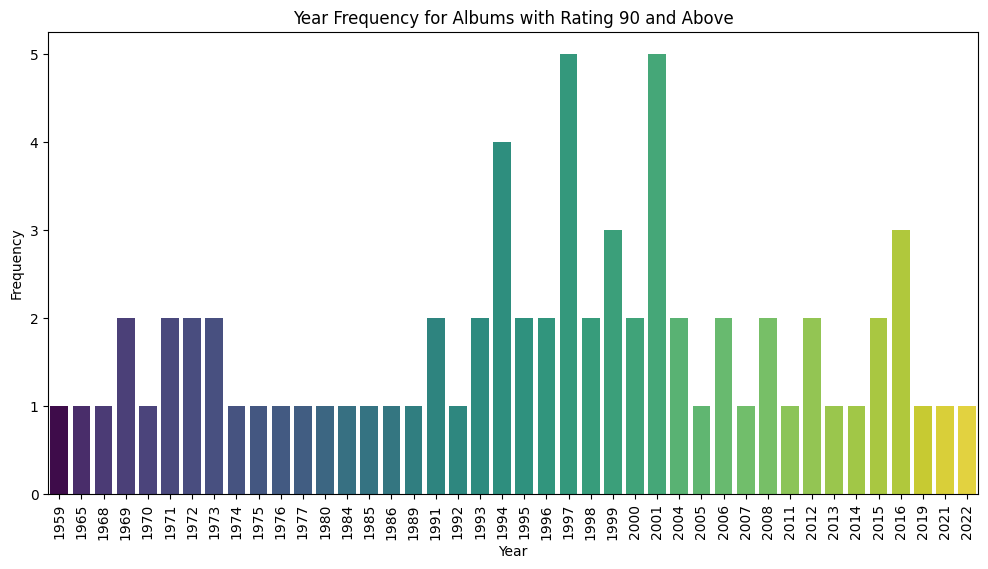

In [6]:
df_high_rating = df[df['user_score'] >= 90]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_high_rating, x='year', hue='year', palette='viridis', legend=False)
plt.title('Year Frequency for Albums with Rating 90 and Above')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

This graph provides a new perspective. Initially, it appeared that the 2010s were the golden era of music. However, when we focus only on albums with ratings above 90, the narrative shifts dramatically. The late 1990s and early 2000s emerge as the standout years for highly-rated music. This suggests that while recent albums are prevalent in the top 5000 list, the truly exceptional albums, as rated by users, are more concentrated in the earlier decades. Next, we will delve into the evolution of music genres over the years. Then we will draw conclusions based on that.

In [7]:
df_genres = df['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

top_genres = df_genres.value_counts().head(10)

print("Most Frequent Genres in Top 5000 Albums:")
print(top_genres)

Most Frequent Genres in Top 5000 Albums:
Singer-Songwriter     427
Indie Rock            377
Art Pop               278
Alternative Rock      256
East Coast Hip Hop    230
Indie Pop             190
Pop Rock              179
Art Rock              166
Synthpop              161
Neo-Psychedelia       144
Name: count, dtype: int64


In [8]:
df_high_rating_genres = df_high_rating['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

top_genres_high_rating = df_high_rating_genres.value_counts().head(10)

print("Top Genres for Albums Rated 90 and Above:")
print(top_genres_high_rating)

Top Genres for Albums Rated 90 and Above:
Art Rock              10
Singer-Songwriter      9
Post-Rock              8
East Coast Hip Hop     6
Experimental Rock      5
Electronic             5
Progressive Rock       5
Conscious Hip Hop      5
Alternative Rock       5
Hardcore Hip Hop       4
Name: count, dtype: int64


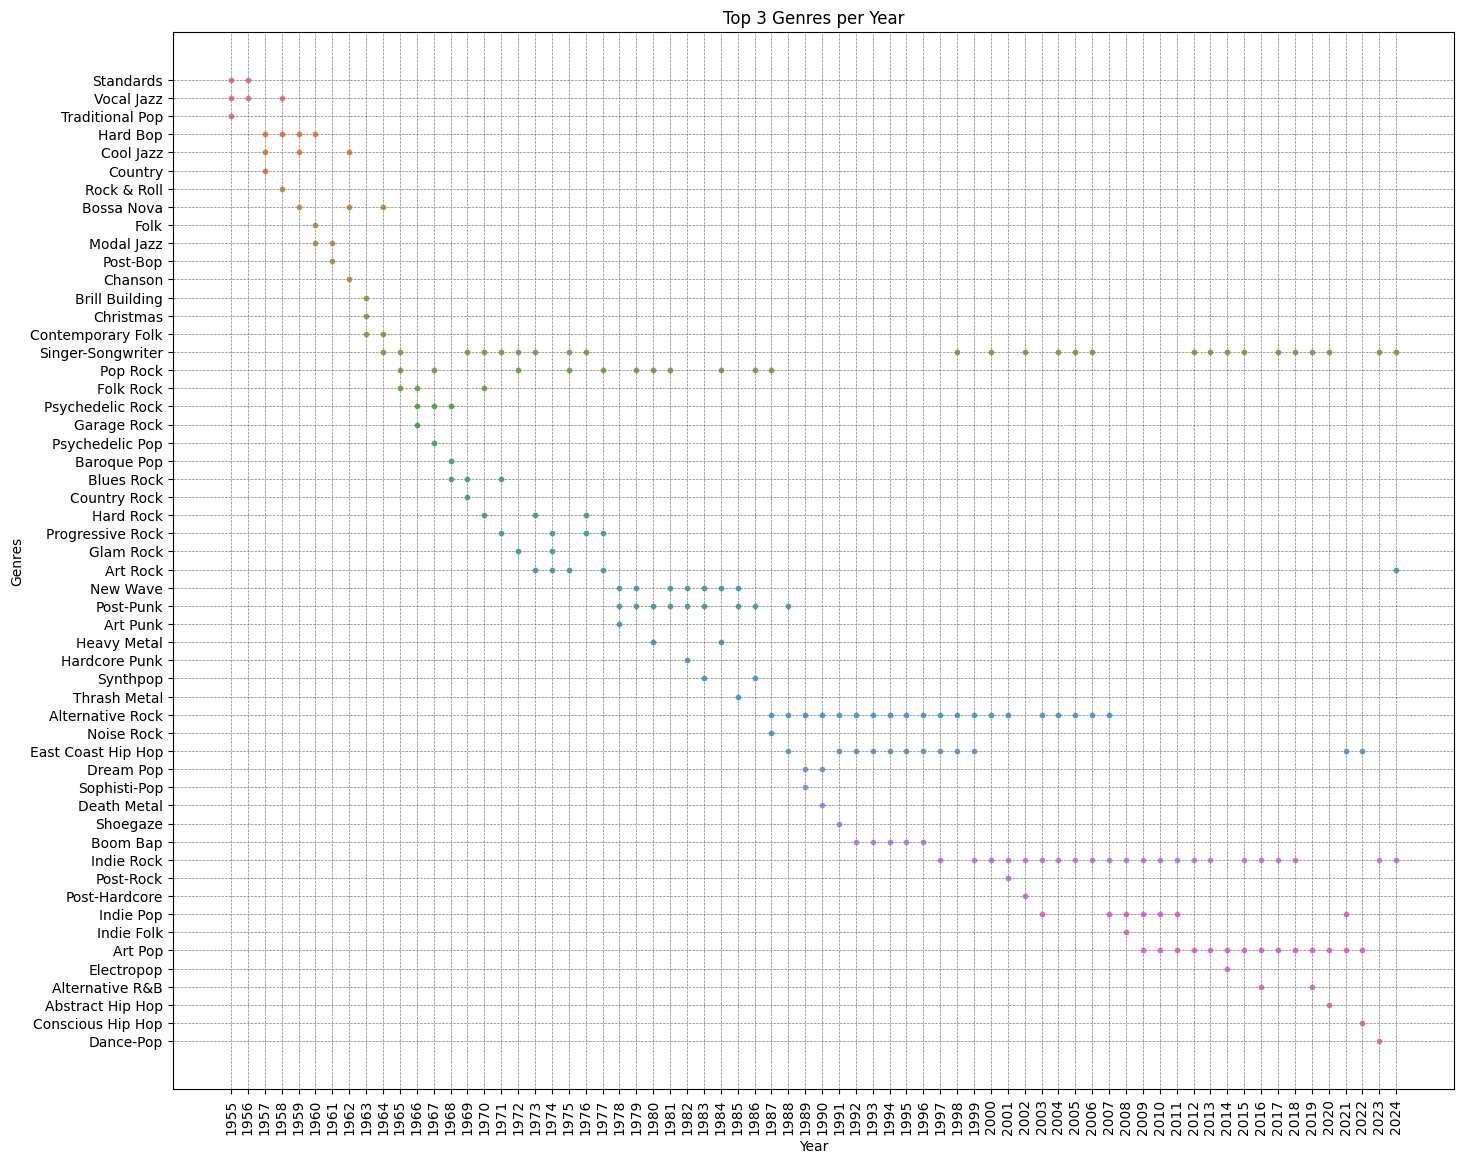

In [10]:
# Calculate the top genres per year
df_genres_per_year = df['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
df_genres_per_year['year'] = df['year']
top_genres_per_year = df_genres_per_year.groupby(['year', 'genre']).size().reset_index(name='count')

top_3_genres_per_year = top_genres_per_year.groupby('year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Filter unique genres to include only those in top 3 genres per year
unique_genres_top_3 = top_3_genres_per_year['genre'].unique()

# Create a color palette for the genres
palette_top_3 = sns.color_palette("husl", len(unique_genres_top_3))
genre_colors_top_3 = dict(zip(unique_genres_top_3, palette_top_3))

# Plot the top 3 genres per year
plt.figure(figsize=(15, 12))
for year in top_3_genres_per_year['year'].unique():
    year_data = top_3_genres_per_year[top_3_genres_per_year['year'] == year]
    for genre in year_data['genre']:
        genre_data = year_data[year_data['genre'] == genre]
        sns.scatterplot(data=genre_data, x='year', y='genre', size='count', sizes=(20, 200), color=genre_colors_top_3[genre], legend=False)

# Add horizontal guide lines
for genre in unique_genres_top_3:
    plt.axhline(y=genre, color='gray', linestyle='--', linewidth=0.5)

# Add vertical lines for each year
for year in top_3_genres_per_year['year'].unique():
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)

plt.title('Top 3 Genres per Year')
plt.xlabel('Year')
plt.ylabel('Genres')
plt.xticks(ticks=top_3_genres_per_year['year'].unique(), rotation=90)
plt.tight_layout(pad=2.0)
plt.show()

### Conclusion

Based on the evolution of genres and user ratings, it appears that while many highly-rated albums are from the 2010s, the truly classic albums tend to be from the 2000s. This observation may be influenced by several factors, including the biases of albumoftheyear.org users, prevailing music trends, and the nostalgia of people who grew up during the internet era with albums from the 90s and 2000s. 

Our analysis shows that new genres tend to emerge every 5 to 10 years. However, in the last decade, there has been less evolution in new genres, with a shift towards more experimental music. The 2010s were a peak period for both experimental and influential music, as well as popular mainstream music. This saturation of experimental music and the lack of variety in new genres may have contributed to the perception that fewer great albums have been produced since 2018. As listeners have become accustomed to experimental sounds, the challenge of creating standout albums has increased, leading to a more competitive and diverse musical landscape.